In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import glob
from keras.preprocessing.image import ImageDataGenerator as idg
from keras.layers import Dropout
import math
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import sys
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

In [46]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set = train_datagen.flow_from_directory('C:/Users/KIIT/DATASET/TRAIN', target_size=(224,224), color_mode="rgb",batch_size=32, class_mode='categorical')
test_datagen = idg(rescale=1./255)
test_set = test_datagen.flow_from_directory('C:/Users/KIIT/DATASET/TEST', target_size=(224,224),color_mode="rgb", batch_size=32, class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [47]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [42]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

# Medium architecture second wala 

In [17]:
model =Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (6, 6),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 128, activation = 'relu', input_dim = 64))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)         

In [18]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 132s 188ms/step - loss: 0.4938 - accuracy: 0.7813 - val_loss: 0.8710 - val_accuracy: 0.5738
Epoch 2/15
706/706 [==============================] - 117s 165ms/step - loss: 0.4480 - accuracy: 0.8101 - val_loss: 0.7812 - val_accuracy: 0.6351
Epoch 3/15
706/706 [==============================] - 136s 193ms/step - loss: 0.4260 - accuracy: 0.8223 - val_loss: 3.9143 - val_accuracy: 0.5595
Epoch 4/15
706/706 [==============================] - 151s 213ms/step - loss: 0.4201 - accuracy: 0.8246 - val_loss: 0.2900 - val_accuracy: 0.8949
Epoch 5/15
706/706 [==============================] - 146s 207ms/step - loss: 0.4066 - accuracy: 0.8309 - val_loss: 0.6576 - val_accuracy: 0.7334
Epoch 6/15
706/706 [==============================] - 152s 215ms/step - loss: 0.3924 - accuracy: 0.8378 - val_loss: 0.2837 - val_accuracy: 0.8830
Epoch 7/15
706/706 [==============================] - 147s 208ms/step - loss: 0.3880 - accuracy: 0.8420 - val_loss: 0.2954 -

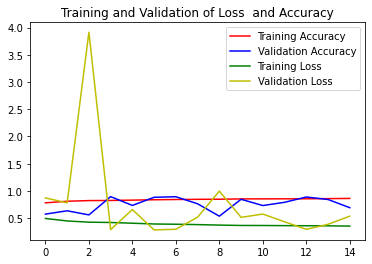

In [19]:
from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [20]:
from glob import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 64, 64, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 2s 32ms/step - loss: 0.5392 - accuracy: 0.6868
Loss on test set:  0.5391551852226257
Accuracy on test set:  0.6868284940719604
(2513,)
(2513,)


array([[1400,    1],
       [ 786,  326]], dtype=int64)

# Heavy architecture

In [43]:
model =Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(224,224,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3),padding = 'same', activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 1024, activation = 'relu', input_dim = 224))
model.add(Dense(units = 512,  activation = 'relu'))
model.add(Dense(units = 256,  activation = 'relu'))
model.add(Dense(units = 128,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 54, 54, 32)        9248      
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 27, 27, 64)      

In [44]:
history = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 969s 1s/step - loss: 0.5019 - accuracy: 0.7672 - val_loss: 0.4239 - val_accuracy: 0.8750
Epoch 2/15
706/706 [==============================] - 764s 1s/step - loss: 0.4206 - accuracy: 0.8251 - val_loss: 0.3512 - val_accuracy: 0.8846
Epoch 3/15
706/706 [==============================] - 765s 1s/step - loss: 0.3853 - accuracy: 0.8431 - val_loss: 0.3519 - val_accuracy: 0.8830
Epoch 4/15
706/706 [==============================] - 728s 1s/step - loss: 0.4270 - accuracy: 0.8132 - val_loss: 0.5876 - val_accuracy: 0.6140
Epoch 5/15
706/706 [==============================] - 859s 1s/step - loss: 0.4028 - accuracy: 0.8336 - val_loss: 0.4032 - val_accuracy: 0.8727
Epoch 6/15
706/706 [==============================] - 802s 1s/step - loss: 0.4271 - accuracy: 0.8151 - val_loss: 0.5651 - val_accuracy: 0.8034
Epoch 7/15
706/706 [==============================] - 729s 1s/step - loss: 0.3940 - accuracy: 0.8367 - val_loss: 0.4188 - val_accuracy: 0.8006

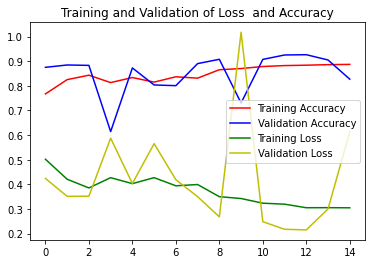

In [48]:
   from matplotlib import pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [50]:
from glob import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (2513, 224, 224, 3)
Total number of labels: (2513, 2)
79/79 [==============================] - 24s 300ms/step - loss: 0.6215 - accuracy: 0.8241
Loss on test set:  0.6215314269065857
Accuracy on test set:  0.8241146206855774
(2513,)
(2513,)


array([[1399,    2],
       [ 440,  672]], dtype=int64)

# DenseNet121

In [53]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

densenet121 = tf.keras.applications.DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)

# don't train existing weights
for layer in densenet121.layers:
  layer.trainable = False

In [55]:
from keras.models import Model
folders = glob('DATASET/TRAIN/*')
x = Flatten()(densenet121.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=densenet121.input, outputs=prediction)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
history  = model.fit(train_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 2479s 4s/step - loss: 0.5985 - accuracy: 0.8034 - val_loss: 0.5736 - val_accuracy: 0.6828
Epoch 2/15
182/706 [======>.......................] - ETA: 31:04 - loss: 0.5137 - accuracy: 0.8542

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [ ]:
import glob
normal_cases_dir = r'DATASET/TEST/O'
idc_cases_dir = r'DATASET/TEST/R'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm